### Kaggle

Group 1

Jenewein Matthias - Jenewein Matthias

Kalarickal Dominic - Kalarickal Dominic

Leander Leirissa - Bitterzoet

Timmer Lars - laltir

# 0. Loading packages

If not all libraries are installed, uncomment the cell below

In [1]:
#%pip install -r requirements.txt

In [2]:
import warnings 

warnings.filterwarnings('ignore')

import functions as f

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import normalize, MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import os
from sklearn.neighbors import KNeighborsClassifier

pd.set_option('display.max_columns', None)

# 1. Loading labeled data labels

In [3]:
labels = pd.read_csv('Datasets/labels_new.csv')

In [4]:
labels.head()

,filename,genre
0,m00248.wav,metal
1,m00230.wav,country
2,m00637.wav,hiphop
3,m00627.wav,metal
4,m00138.wav,reggae


# 2. Feature Engineering

In [5]:
labeled_files = os.listdir('Datasets/labeled')
unlabeled_files = os.listdir('Datasets/unlabeled')

print("Labeled files:", labeled_files)
print("Unlabeled files:", unlabeled_files)

Labeled files: ['m00002.wav', 'm00039.wav', 'm00041.wav', 'm00072.wav', 'm00096.wav', 'm00102.wav', 'm00112.wav', 'm00138.wav', 'm00192.wav', 'm00206.wav', 'm00230.wav', 'm00236.wav', 'm00248.wav', 'm00253.wav', 'm00298.wav', 'm00313.wav', 'm00338.wav', 'm00339.wav', 'm00351.wav', 'm00400.wav', 'm00421.wav', 'm00429.wav', 'm00435.wav', 'm00454.wav', 'm00477.wav', 'm00501.wav', 'm00503.wav', 'm00513.wav', 'm00553.wav', 'm00606.wav', 'm00623.wav', 'm00627.wav', 'm00629.wav', 'm00633.wav', 'm00637.wav', 'm00658.wav', 'm00671.wav', 'm00676.wav', 'm00677.wav', 'm00678.wav', 'm00716.wav', 'm00762.wav', 'm00772.wav', 'm00773.wav', 'm00801.wav', 'm00821.wav', 'm00850.wav', 'm00867.wav', 'm00895.wav', 'm00996.wav']
Unlabeled files: ['m00003.wav', 'm00012.wav', 'm00013.wav', 'm00043.wav', 'm00044.wav', 'm00055.wav', 'm00061.wav', 'm00063.wav', 'm00069.wav', 'm00074.wav', 'm00107.wav', 'm00114.wav', 'm00127.wav', 'm00137.wav', 'm00139.wav', 'm00148.wav', 'm00149.wav', 'm00156.wav', 'm00183.wav', 

### Load and Process Features from Audio Files  
This cell handles the loading and processing of features extracted from labeled and unlabeled audio files:  
- An instance of the `DataLoader` class is initialized.  
- The `featureDataFrame` method is called twice to generate DataFrames containing features for labeled and unlabeled files:  
  - Labeled features are extracted from the `labeled_files` directory and saved in `labeled_features_df`.  
  - Unlabeled features are extracted from the `unlabeled_files` directory and saved in `unlabeled_features_df`.  
- The `labeled_features_df` DataFrame is merged with the `labels` DataFrame on the `filename` column to associate labels with the features.  

Finally, both the labeled and unlabeled DataFrames are displayed to preview their structure and contents.  


In [6]:
dl = f.DataLoader()

labeled_features_df = dl.featureDataFrame(labeled_files, 'Datasets/labeled')
unlabeled_features_df = dl.featureDataFrame(unlabeled_files, 'Datasets/unlabeled')

labeled_features_df = labeled_features_df.merge(labels, on='filename')

print("Labeled Features DataFrame")
display(labeled_features_df.head())

print("\nUnlabeled Features DataFrame")
display(unlabeled_features_df.head())

Labeled Features DataFrame


,spectral_centroid,spectral_bandwidth,spectral_contrast,zero_crossing_rate,rms,spectral_rolloff,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,mfcc_mean_10,mfcc_mean_11,mfcc_mean_12,mfcc_mean_13,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_mean_7,chroma_mean_8,chroma_mean_9,chroma_mean_10,chroma_mean_11,chroma_mean_12,tempo,contrast_mean_1,contrast_mean_2,contrast_mean_3,contrast_mean_4,contrast_mean_5,contrast_mean_6,contrast_mean_7,tonnetz_mean_1,tonnetz_mean_2,tonnetz_mean_3,tonnetz_mean_4,tonnetz_mean_5,tonnetz_mean_6,flatness_mean,filename,genre
0,3110.898196,2992.010638,17.236284,0.152857,0.198322,6744.988603,-18.845390,71.325661,-3.766896,-1.408727,0.705463,-1.058955,-1.054825,-0.247421,0.625723,0.427043,-1.503742,-1.076155,2.419871,0.412797,0.537429,0.301002,0.379488,0.269635,0.380168,0.264904,0.303025,0.473597,0.332073,0.445475,0.293710,95.703125,17.233862,14.865518,18.241217,18.563320,19.586907,17.007064,15.156099,-0.130213,-0.030896,-0.059284,-0.000773,0.012796,-0.016378,0.078496,m00041.wav,pop
1,1451.862124,1920.270843,24.220021,0.051224,0.050480,3047.431199,-298.756134,112.076279,6.488818,28.389170,-6.770987,16.645588,-11.807552,12.744363,-8.340971,13.893223,-4.237727,2.317613,-4.329582,0.117655,0.133911,0.220483,0.188410,0.168177,0.193637,0.130628,0.203946,0.364396,0.287583,0.224478,0.185700,129.199219,19.667917,20.515668,26.072390,25.745788,23.396068,19.541724,34.600593,0.008745,0.028968,-0.004044,0.020831,-0.043709,-0.007959,0.001261,m00002.wav,jazz
2,2624.814629,2709.897108,19.451050,0.120217,0.142927,5605.777240,-69.630653,83.072273,-16.599928,0.118371,7.420608,0.770008,1.337478,4.695799,-1.416824,3.319435,-2.878265,-8.202150,-5.767511,0.286717,0.369671,0.274070,0.371769,0.311118,0.487251,0.551675,0.375336,0.508559,0.282717,0.376277,0.277690,129.199219,29.752017,16.141935,18.926104,19.113687,19.466281,17.548978,15.208348,-0.057095,-0.026923,-0.016473,-0.016696,-0.004114,0.005338,0.038256,m00072.wav,disco
3,1174.324843,1518.126210,21.586395,0.066340,0.009491,2083.791215,-436.858215,154.080429,-19.861961,20.182659,3.173895,0.450946,-6.527719,-4.608915,-10.058647,-6.156631,-4.533360,-2.767047,-5.211671,0.258693,0.249861,0.236609,0.197587,0.472781,0.232474,0.371331,0.196571,0.125784,0.195981,0.134478,0.428746,123.046875,19.732632,20.660649,24.891295,25.228981,24.046095,20.661755,15.883361,0.301314,-0.125383,0.062903,0.015674,0.008853,-0.006430,0.000978,m00102.wav,classical
4,1811.410394,2019.300257,22.125983,0.072150,0.123665,3854.851374,-169.153351,110.459999,-8.576200,43.884247,0.274970,26.637419,-14.368152,13.034432,-11.149249,8.130109,-7.692966,10.910651,-8.175924,0.412044,0.333314,0.389579,0.370359,0.308951,0.386791,0.288708,0.329985,0.243529,0.297682,0.422818,0.401892,135.999178,19.964829,17.050832,21.109923,19.301231,20.553355,18.597363,38.304349,-0.055290,0.124234,0.011880,-0.021722,0.016998,0.003116,0.004313,m00039.wav,reggae



Unlabeled Features DataFrame


,spectral_centroid,spectral_bandwidth,spectral_contrast,zero_crossing_rate,rms,spectral_rolloff,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,mfcc_mean_10,mfcc_mean_11,mfcc_mean_12,mfcc_mean_13,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_mean_7,chroma_mean_8,chroma_mean_9,chroma_mean_10,chroma_mean_11,chroma_mean_12,tempo,contrast_mean_1,contrast_mean_2,contrast_mean_3,contrast_mean_4,contrast_mean_5,contrast_mean_6,contrast_mean_7,tonnetz_mean_1,tonnetz_mean_2,tonnetz_mean_3,tonnetz_mean_4,tonnetz_mean_5,tonnetz_mean_6,flatness_mean,filename
0,1900.384454,2420.093629,20.096082,0.066173,0.183958,4189.731819,-111.209496,103.165291,10.905522,34.357307,22.339897,17.869793,6.807890,6.331836,5.493648,0.614028,0.338712,3.830157,2.037151,0.308940,0.418922,0.317481,0.317869,0.495308,0.381528,0.407861,0.321004,0.401797,0.483401,0.334845,0.347140,107.666016,24.412625,17.589618,21.201438,20.587069,21.338418,19.083820,16.459584,0.164663,-0.105102,-0.104005,-0.016431,0.021987,0.044520,0.016659,m00055.wav
1,1952.607933,1865.996047,23.250822,0.123423,0.029083,3779.909832,-287.603699,101.758171,-35.345406,41.280159,-12.727132,17.276148,-13.967989,16.304947,-5.592962,13.654110,-8.788416,-0.053095,-13.757538,0.397867,0.143860,0.112334,0.102700,0.387867,0.583642,0.278688,0.283264,0.192714,0.517787,0.310177,0.168636,184.570312,15.679685,18.681856,21.483555,23.963961,24.473956,23.647332,34.825406,0.026706,0.160484,-0.160780,0.035666,-0.019523,0.015149,0.002211,m00013.wav
2,790.507005,900.409298,20.252849,0.052088,0.018833,1159.412273,-437.604401,170.931534,7.419581,-3.083473,0.789382,-11.128749,-12.522781,-6.907836,-5.858702,-8.461237,-8.481487,-8.339388,-7.378574,0.121688,0.103558,0.303260,0.355438,0.127611,0.195966,0.140674,0.182006,0.287204,0.227969,0.408830,0.159130,143.554688,14.756063,17.163709,22.318450,24.297561,24.119580,21.639522,17.475062,-0.156577,0.112052,0.046222,-0.127561,-0.020312,-0.002277,0.000153,m00044.wav
3,2384.634958,2072.759900,19.720750,0.126073,0.100411,4584.132502,-120.147491,91.317215,-38.845890,75.008400,-3.813260,22.665588,-8.119441,23.654900,-14.630774,13.370975,-9.403306,13.706296,-9.315235,0.420561,0.352720,0.438729,0.588504,0.809106,0.540158,0.336136,0.368313,0.400302,0.380119,0.425498,0.526869,135.999178,18.871521,14.355007,15.568276,14.744588,16.072624,19.146556,39.286679,0.034065,-0.045781,0.069088,0.054560,0.021101,-0.025107,0.008830,m00043.wav
4,2908.300131,2286.252592,20.044021,0.178108,0.217475,5405.816551,-1.913298,72.686157,-32.791992,63.605473,-18.556351,25.870161,-13.859100,18.078884,-11.946615,19.672184,-13.954248,18.755697,-11.187991,0.456810,0.557374,0.680656,0.526191,0.406365,0.417328,0.367432,0.334647,0.365308,0.423689,0.311572,0.326612,103.359375,18.524161,13.818721,18.002752,15.368700,15.475696,17.230423,41.887691,0.042327,0.049303,-0.013115,-0.043613,-0.026224,0.003401,0.026373,m00012.wav


## Feature Explanations and Calculations in Machine Learning Audio Analysis

### 1. Spectral Centroid

**Explanation:**  
The spectral centroid represents the center of gravity of the spectral energy distribution. A higher spectral centroid is indicative of a brighter sound. It quantifies the frequency where the majority of the signal's energy resides.  

**Calculation:**  
Using the `librosa` library, the spectral centroid is computed as the weighted mean of the frequencies, with the magnitudes serving as weights.  

**Mathematical Formula:**  
$$
\text{Spectral Centroid} = \frac{\sum_{n=0}^{N-1} f(n)\,x(n)}{\sum_{n=0}^{N-1} x(n)}
$$  
Where:  
- \(x(n)\): Magnitude of the frequency bin.  
- \(f(n)\): Frequency value.  

The chart below shows that this feature is important to distinguish genres as the spectral centroid differs vastly between genres.

**References:**  
- Harpale & Bairagi, 2021  
- [Librosa Documentation](https://librosa.org)  
- Wikipedia contributors, 2024  

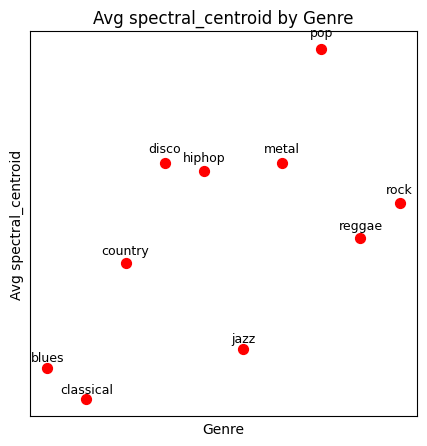

In [7]:
f.visualize_feature('spectral_centroid', labeled_features_df)

### 2. Spectral Bandwidth

**Explanation:**  
Spectral bandwidth represents the spread or variance of frequencies around the spectral centroid. A wider bandwidth indicates a more rhythmically diverse or noisier sound.  

**Calculation:**  
Librosa computes the spectral bandwidth as the weighted standard deviation of frequencies around the spectral centroid.  

**Mathematical Formula:**  
$$
\text{Spectral Bandwidth} = \frac{\sum_{n=0}^{N-1} \left(f(n) - \text{Spectral Centroid}\right)^2 \cdot x(n)}{\sum_{n=0}^{N-1} x(n)}
$$  
Where:  
- \(x(n)\): Magnitude of the frequency bin.  
- \(f(n)\): Frequency value.  

The chart below shows that this feature is important to distinguish genres as the spectral bandwidth differs vastly between genres.

**Reference:**  
- [Librosa Documentation](https://librosa.org)  

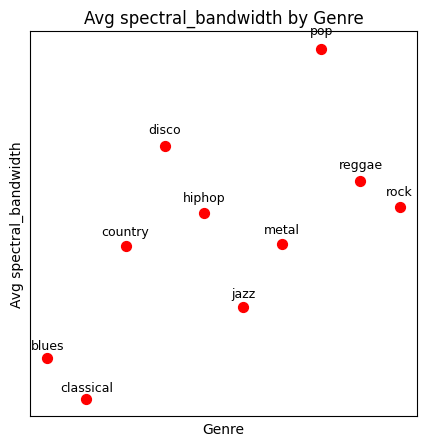

In [8]:
f.visualize_feature('spectral_bandwidth', labeled_features_df)

### 3. Zero Crossing Rate (ZCR)

**Explanation:**  
Zero Crossing Rate measures the rate at which a signal crosses the zero amplitude line. High ZCR is typical of noisier signals, while lower ZCR is associated with smoother sounds.  

**Calculation:**  
Librosa computes ZCR by counting the zero crossings in a signal and normalizing by the total number of frames.  

**Mathematical Formula:**  
$$
\text{ZCR} = \frac{1}{T} \sum_{t=1}^{T} \mathbb{I}\left\{x(t-1) \cdot x(t) < 0\right\}
$$  

The chart below shows that this feature is important to distinguish genres as the zero crossing rate differs vastly between genres.

**Reference:**  
- [Librosa Documentation](https://librosa.org)  


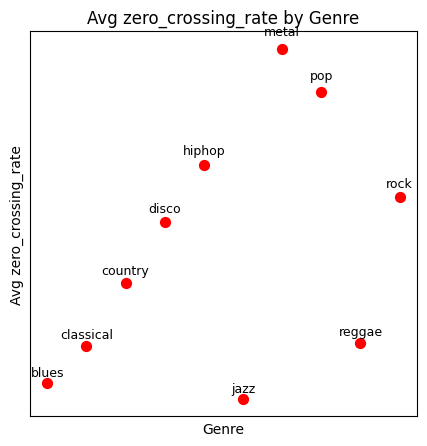

In [9]:
f.visualize_feature('zero_crossing_rate', labeled_features_df)

### 4. Root Mean Square (RMS)

**Explanation:**  
Root Mean Square (RMS) quantifies the loudness or energy of an audio signal. Higher RMS values correspond to louder sounds.  

**Calculation:**  
Librosa computes RMS as the square root of the mean of the squared amplitudes.  

The chart below shows that this feature is important to distinguish genres as the root mean square differs vastly between genres.

**Mathematical Formula:**  
$$
\text{RMS} = \sqrt{ \frac{1}{N} \sum_{n=1}^{N} \left(\text{amplitude}_n\right)^2 }
$$  


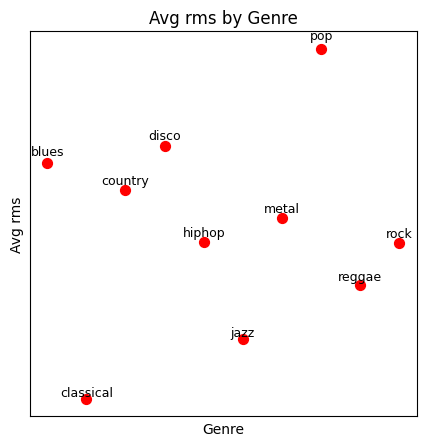

In [10]:
f.visualize_feature('rms', labeled_features_df)

### 5. Spectral Rolloff

**Explanation:**  
Spectral rolloff defines the frequency below which a specified percentage (e.g., 85%) of the total spectral energy is concentrated. It helps differentiate between harmonic and non-harmonic sounds.  

**Calculation:**  
Librosa calculates spectral rolloff as the frequency \(f(r)\) where the cumulative sum of spectral magnitudes reaches a specified ratio \(r\) of the total energy.  

The chart below shows that this feature is important to distinguish genres as the spectral rolloff differs vastly between genres.

**Mathematical Formula:**  
$$
\text{Spectral Rolloff} = f(r) \quad \text{where} \quad \sum_{n=0}^{k} x(n) = r \cdot \sum_{n=0}^{N-1} x(n)
$$  


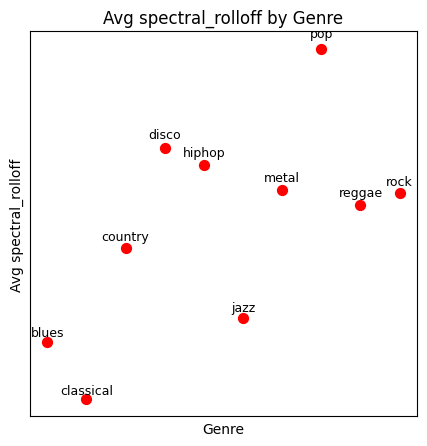

In [11]:
f.visualize_feature('spectral_rolloff', labeled_features_df)

### 6. MFCC Means

**Explanation:**  
Mel-Frequency Cepstral Coefficients (MFCCs) characterize the tonal and textural qualities of an audio signal. Computing the mean MFCC provides a summary of these features across an entire audio clip.  

**Calculation:**  
Librosa calculates the MFCC means by averaging the coefficients across all frames.  

The chart below shows that this feature is important to distinguish genres as the MFCC differs vastly between genres.

**Mathematical Formula:**  
$$
\text{MFCC}_i = \frac{1}{N} \sum_{n=0}^{N-1} \text{MFCC}(i, n)
$$  


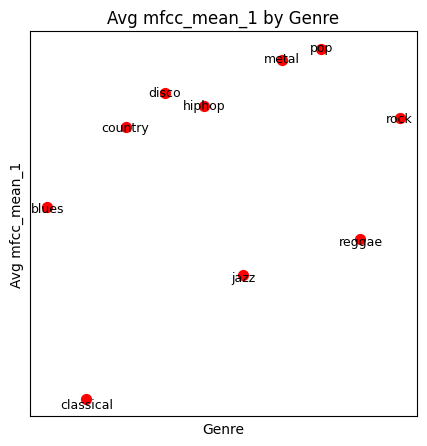

In [12]:
f.visualize_feature('mfcc_mean_1', labeled_features_df)

To display not just one mean value, we can use a multi-line plot.

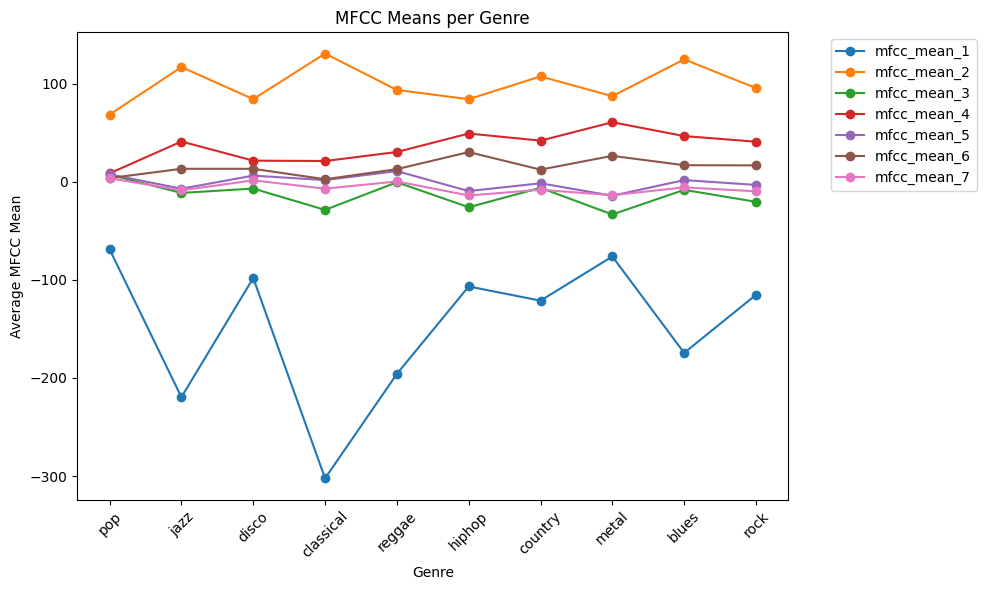

In [13]:
f.visualize_feature_multiline(df=labeled_features_df, feature_prefix='mfcc_mean_', num_sub_features=7, x_col='genre', x_label='Genre',y_label='Average MFCC Mean',title='MFCC Means per Genre')

### 7. Chroma Mean

**Explanation:**  
Chroma features capture the energy distribution across the 12 pitch classes (e.g., C, D, E, etc.) within an octave. The Chroma Mean represents the average intensity of these pitch classes over the entire audio clip.  

**Calculation:**  
Librosa computes the Chroma Mean by mapping frequency spectra to pitch classes and averaging their intensity across all frames.  

The chart below shows that this feature is important to distinguish genres as the chroma mean differs vastly between genres.

**Mathematical Formula:**  
$$
\text{Chroma Mean}_i = \frac{1}{N} \sum_{n=0}^{N-1} \text{Chroma}(i, n)
$$  

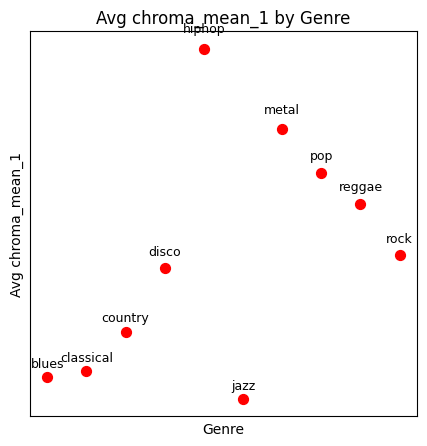

In [18]:
f.visualize_feature('chroma_mean_1', labeled_features_df)

To display not just one mean value, we can use a multi-line plot.

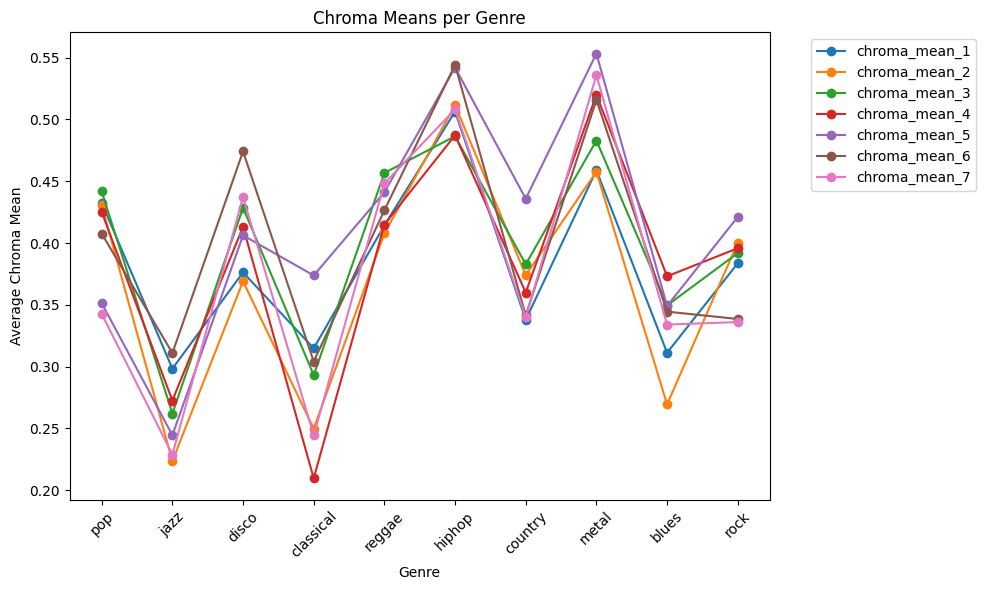

In [19]:
f.visualize_feature_multiline(df=labeled_features_df, feature_prefix='chroma_mean_', num_sub_features=7, x_col='genre', x_label='Genre',y_label='Average Chroma Mean',title='Chroma Means per Genre')

### 8. Tempo

**Explanation:**  
Tempo represents the speed of an audio signal, typically measured in beats per minute (BPM). It plays a crucial role in rhythmic and genre classification.  

**Calculation:**  
Librosa determines the BPM by computing the reciprocal of the average beat interval.  

The chart below shows that this feature is important to distinguish genres as the tempo differs vastly between genres.

**Mathematical Formula:**  
$$
\text{Tempo (BPM)} = \frac{60}{\text{Average Beat Interval (seconds)}}
$$  

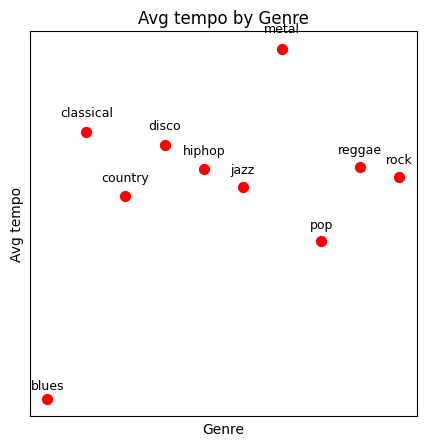

In [20]:
f.visualize_feature('tempo', labeled_features_df)

### 9. Spectral Contrast

**Explanation:**  
Spectral Contrast quantifies the amplitude difference between high-energy (peaks) and low-energy (valleys) regions within frequency bands. The mean spectral contrast provides an overall summary of these differences across all frames.  

**Calculation:**  
Librosa computes the mean by averaging the spectral contrasts across frames for each frequency band.  

The chart below shows that this feature is important to distinguish genres as the spectral contrast differs vastly between genres.

**Mathematical Formula:**  
$$
\text{Spectral Contrast}_i = \frac{\max(x_i) - \min(x_i)}{\max(x_i)}
$$  


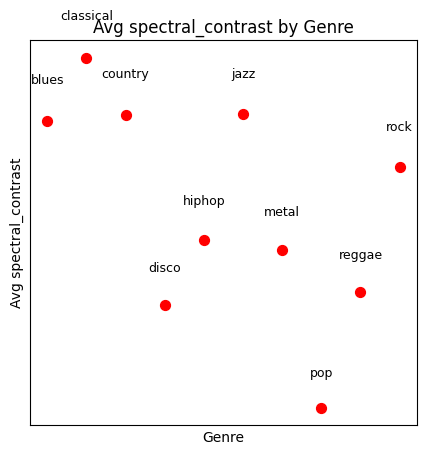

In [21]:
f.visualize_feature('spectral_contrast', labeled_features_df)

To display not just one mean value, we can use a multi-line plot.

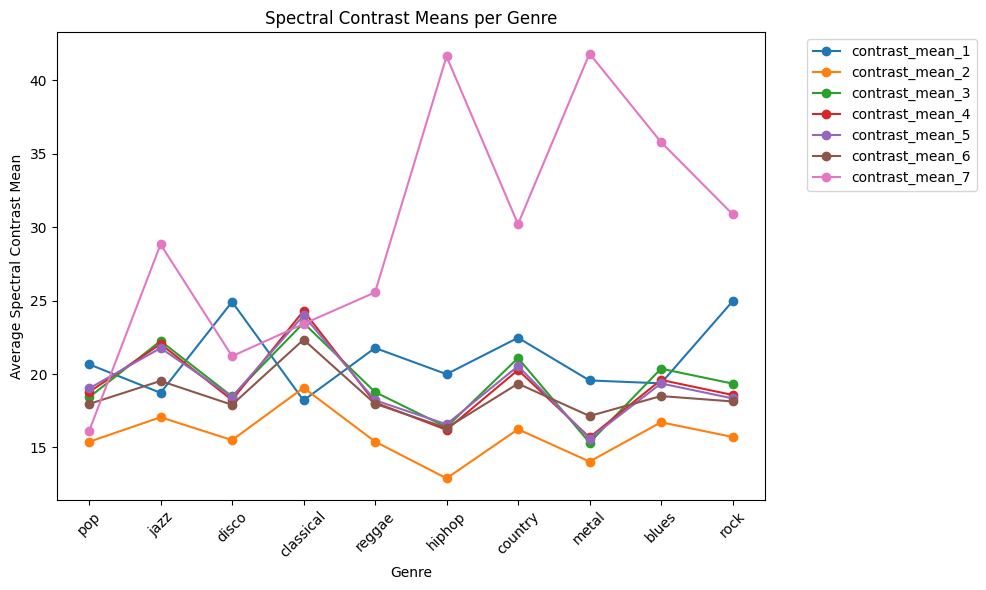

In [22]:
f.visualize_feature_multiline(df=labeled_features_df,feature_prefix='contrast_mean_',num_sub_features=7,x_col='genre', x_label='Genre',y_label='Average Spectral Contrast Mean', title='Spectral Contrast Means per Genre')

### 10. Tonnetz Mean

**Explanation:**  
Tonnetz features represent harmonic relationships between pitches, such as intervals or chords. The Tonnetz Mean summarizes these relationships over time.  

**Calculation:**  
Librosa transforms chroma features into the Tonnetz space and computes the average value for each dimension across all frames.  

The chart below shows that this feature is important to distinguish genres as the tonnetz mean differs vastly between genres.

**Mathematical Formula:**  
$$
\text{Tonnetz Mean}_i = \frac{1}{N} \sum_{n=0}^{N-1} \text{Tonnetz}(i, n)
$$  


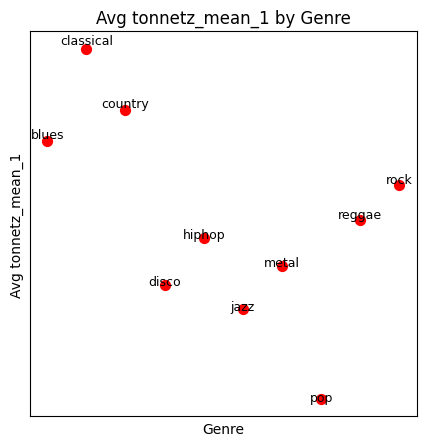

In [23]:
f.visualize_feature('tonnetz_mean_1', labeled_features_df)

To display not just one mean value, we can use a multi-line plot.

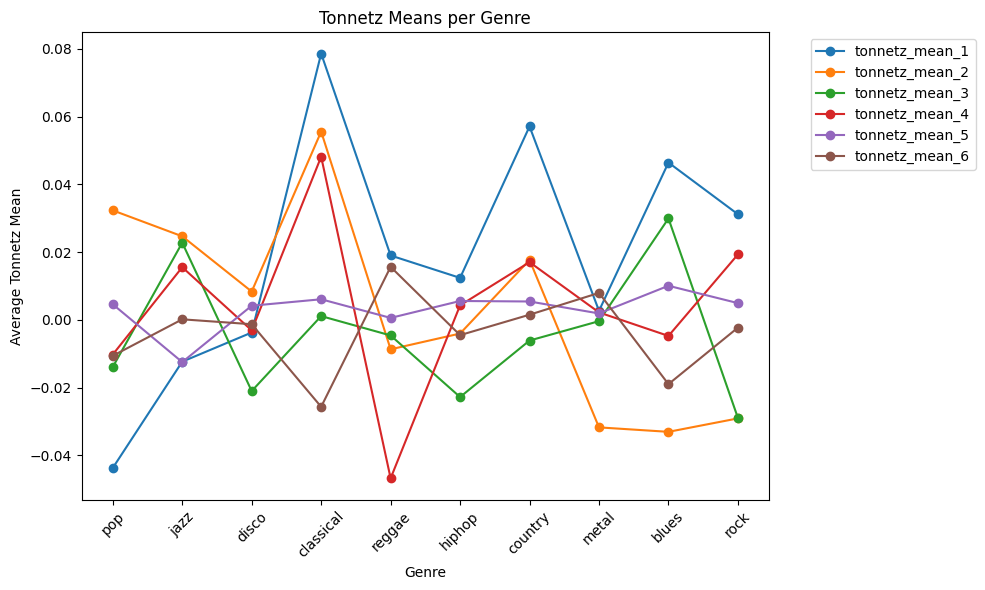

In [24]:
f.visualize_feature_multiline(df=labeled_features_df,feature_prefix='tonnetz_mean_', num_sub_features=6, x_col='genre', x_label='Genre',y_label='Average Tonnetz Mean',title='Tonnetz Means per Genre')

### 11. Spectral Flatness

**Explanation:**  
Spectral Flatness measures the resemblance of a sound to a pure tone. Lower values indicate purer tones, while higher values suggest noise-like signals.  

**Calculation:**  
Librosa calculates it as the ratio of the geometric mean to the arithmetic mean of spectral magnitudes.  

The chart below shows that this feature is important to distinguish genres as the spectral flatness differs vastly between genres.

**Mathematical Formula:**  
$$
\text{Spectral Flatness} = \frac{\left( \prod_{n=0}^{N-1} x(n) \right)^{\frac{1}{N}}}{\frac{1}{N} \sum_{n=0}^{N-1} x(n)}
$$  


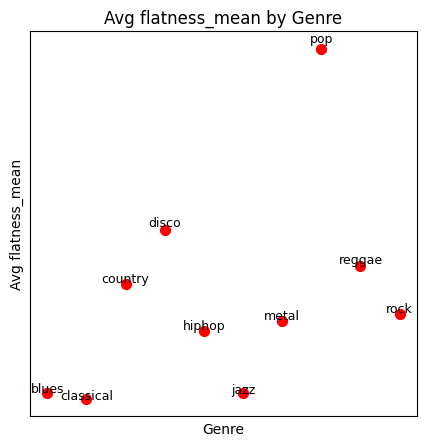

In [25]:
f.visualize_feature('flatness_mean', labeled_features_df)

Especially the genres "pop" & "classical" often seem to differ a lot from the rest of the genres which makes them potential candidates to be one of the clusters. Of course this is only based now on the labeled dataset and has to be analysed thoroughly.  So we calcualte the average mean for all features per genre and map them agains the average feature value across ALL features and display them:

In [26]:
avg_features_by_genre = labeled_features_df.groupby('genre').mean().reset_index()

avg_features_by_genre['overall_mean'] = avg_features_by_genre.drop('genre', axis=1).mean(axis=1)

print(avg_features_by_genre)

       genre  spectral_centroid  spectral_bandwidth  spectral_contrast  \
0      blues        1583.387647         1743.755155          21.382800   
1  classical        1435.502063         1583.313469          22.110814   
2    country        2083.312910         2181.117729          21.450688   
3      disco        2561.331811         2572.697428          19.239101   
4     hiphop        2519.631562         2310.307216          19.999706   
5       jazz        1675.108026         1944.565406          21.454712   
6      metal        2557.961237         2188.541721          19.881724   
7        pop        3102.778575         2952.233656          18.045874   
8     reggae        2202.812513         2436.350580          19.391925   
9       rock        2369.401074         2335.257509          20.849270   

   zero_crossing_rate       rms  spectral_rolloff  mfcc_mean_1  mfcc_mean_2  \
0            0.076771  0.140737       3265.544394  -174.428619   124.715576   
1            0.085169  0.04

In [27]:
average_mean_across_genres = avg_features_by_genre.mean()

print("Average Mean Across Genres:", average_mean_across_genres)

Average Mean Across Genres: spectral_centroid     2209.122742
spectral_bandwidth    2224.813987
spectral_contrast       20.380661
zero_crossing_rate       0.107487
rms                      0.115506
spectral_rolloff      4556.240872
mfcc_mean_1           -147.843109
mfcc_mean_2             99.217201
mfcc_mean_3            -13.484764
mfcc_mean_4             36.124031
mfcc_mean_5             -0.787490
mfcc_mean_6             14.770930
mfcc_mean_7             -6.208885
mfcc_mean_8             11.254765
mfcc_mean_9             -7.062459
mfcc_mean_10             8.316930
mfcc_mean_11            -5.524913
mfcc_mean_12             5.753503
mfcc_mean_13            -5.276491
chroma_mean_1            0.383466
chroma_mean_2            0.369403
chroma_mean_3            0.397606
chroma_mean_4            0.387157
chroma_mean_5            0.411858
chroma_mean_6            0.400809
chroma_mean_7            0.375572
chroma_mean_8            0.397711
chroma_mean_9            0.392805
chroma_mean_10      

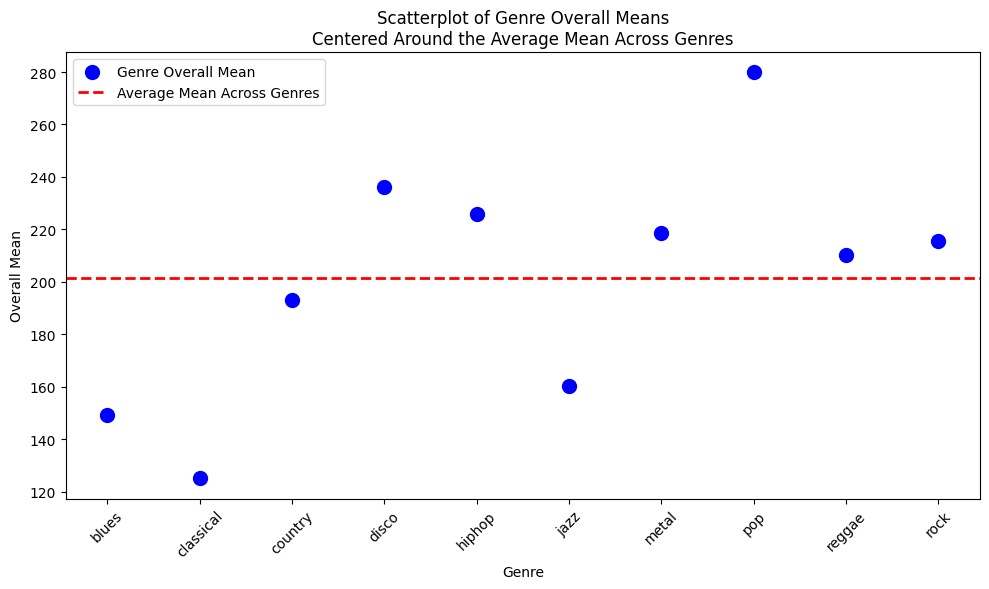

In [28]:
df_genre = labeled_features_df.groupby('genre').mean().reset_index()

df_genre['overall_mean'] = df_genre.drop('genre', axis=1).mean(axis=1)

average_mean_across_genres = df_genre['overall_mean'].mean()

plt.figure(figsize=(10, 6))

plt.scatter(df_genre['genre'], df_genre['overall_mean'], color='blue', s=100, label='Genre Overall Mean')

plt.axhline(y=average_mean_across_genres, color='red', linestyle='--', linewidth=2, label='Average Mean Across Genres')

plt.xlabel('Genre')
plt.ylabel('Overall Mean')
plt.title('Scatterplot of Genre Overall Means\nCentered Around the Average Mean Across Genres')

plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

Plotting the average values of all features per genre against the total average value across all features and genres, supports our first guess that the genres "classical" and "pop" are good candidates for potential clusters based on the labeled dataset. A third potential cluster could either be metal or hiphop because they seemingly display a decent average of the values of the other clusters (except classical and pop). 

### Scale Numeric Features for NMF Compatibility  
This cell processes numeric features from the labeled and unlabeled feature DataFrames to prepare them for Non-Negative Matrix Factorization (NMF):  
- Numeric columns are extracted from both `unlabeled_features_df` and `labeled_features_df` using `select_dtypes(include=[np.number])`.  
- If a `cluster` column exists, it is dropped from both DataFrames to ensure only relevant features are included.  
- A `MinMaxScaler` is initialized with a range of 1 to 2. This scaling range was chosen to avoid issues with non-negative numbers encountered during NMF when using `StandardScaler` or a `MinMaxScaler` with a 0 to 1 range.  
- The scaler is fitted on the unlabeled numeric features (`unlabeled_numeric`) and applied to transform both unlabeled and labeled numeric features.  

The resulting scaled feature arrays (`unlabeled_scaled` and `labeled_scaled`) are now ready for dimensionality reduction or further analysis.


In [29]:
unlabeled_numeric = unlabeled_features_df.select_dtypes(include=[np.number])
labeled_numeric = labeled_features_df.select_dtypes(include=[np.number])

if 'cluster' in unlabeled_numeric.columns:
    unlabeled_numeric.drop('cluster', axis=1, inplace=True)
    
if 'cluster' in labeled_numeric.columns:
    labeled_numeric.drop('cluster', axis=1, inplace=True)
    
scaler = MinMaxScaler((1, 2))

unlabeled_scaled = scaler.fit_transform(unlabeled_numeric)
labeled_scaled = scaler.transform(labeled_numeric)

In [30]:
unlabeled_knn = pd.DataFrame(unlabeled_scaled, columns=unlabeled_numeric.columns)
labeled_knn = pd.DataFrame(labeled_scaled, columns=labeled_numeric.columns)

# 3. Unsupervised Learning

### K-Means Clustering: Overview and Workflow  

K-Means Clustering is an **unsupervised learning algorithm** designed to partition an unlabeled dataset into distinct clusters. The parameter \( K \) specifies the number of clusters, e.g., $ K = 5 $ creates **five clusters**, and $ K = 10 $ forms **ten clusters**.  

#### Objectives of K-Means Clustering:  
1. Identify the optimal positions of $ K $ cluster centers (centroids).  
2. Assign each data point to the closest cluster based on **distance metrics**.  

---

### Workflow of the K-Means Algorithm  

#### **Step 1: Choose the Number of Clusters ($ K $)**  
- Determine $ K $ using methods like the **Elbow Method** or domain knowledge.  

#### **Step 2: Initialize $ K $ Cluster Centers**  
- Randomly select $ K $ data points as initial cluster centers.  

#### **Step 3: Compute Distances**  
- Calculate the distance between each data point and all cluster centers using the **Euclidean distance**:  
  $$  
  d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}  
  $$  

#### **Step 4: Assign Data Points to Clusters**  
- Allocate each data point to the cluster with the nearest center based on the computed distances.  

#### **Step 5: Update Cluster Centers**  
- Recalculate the cluster centers as the **mean** of the data points assigned to each cluster:  
  $$  
  c_j = \frac{1}{N_j} \sum_{i \in C_j} x_i  
  $$  
  Where:  
  - $ c_j $: New centroid of cluster $ j $.  
  - $ N_j $: Number of points in cluster $ j $.  

#### **Step 6: Repeat Until Convergence**  
- Iterate **Steps 3 to 5** until one of the following occurs:  
  - Cluster assignments **stabilize**.  
  - A **maximum number of iterations** is reached.  
  - The cluster centers become **unchanged**.  

---

### Key Notes:  
- The algorithm assumes clusters are spherical and equally sized.  
- Performance may depend on the initial choice of cluster centers, which is why multiple initializations are often used.  

#### Reference  
Dharmaraj, 2022  


### Hierarchical Clustering  

Hierarchical clustering is an **unsupervised learning algorithm** that groups data points based on similarity. Unlike **K-Means clustering**, hierarchical clustering does not require specifying the number of clusters beforehand. Instead, it generates a **tree-like structure (dendrogram)** that visualizes the relationships between data points.  

---

### Workflow of Hierarchical Clustering  

1. **Compute Distance Matrix**  
   - Measure the similarity or distance between all pairs of data points using metrics like **Euclidean distance**.

2. **Initialize Each Data Point as a Separate Cluster**  
   - Begin with $ n $ clusters, where each cluster contains a single data point.

3. **Merge the Closest Clusters**  
   - Combine the two clusters that are the most similar.

4. **Repeat Until One Cluster Remains**  
   - Continue merging clusters iteratively until all points are grouped into a **single cluster**.

---

### Dendrogram: Visual Representation of Clusters  

A **dendrogram** is a hierarchical tree structure that illustrates how clusters are formed.  
- The **height of each merge** indicates the **dissimilarity** between clusters.  
- A **horizontal cut** at a specific height determines the final number of clusters.  

---

### Types of Hierarchical Clustering  

#### **1. Agglomerative Clustering (Bottom-Up)**  
- Begins with **each data point as its own cluster**.  
- Clusters are **iteratively merged** based on similarity.  
- This is the **most common approach** to hierarchical clustering.  

#### **2. Divisive Clustering (Top-Down)**  
- Starts with **one large cluster** containing all data points.  
- The cluster is **recursively split** into smaller clusters.  
- Computationally more intensive and less commonly used.  

---

### Applications and Key Notes  
- **Applications**: Gene expression analysis, market segmentation, and text analysis.  
- **Advantages**: No need to predefine $ K $, and dendrograms provide a clear visualization of relationships.  
- **Disadvantages**: Computationally expensive for large datasets.  

---

### **Reference**  
Batra, 2022  


### Gaussian Mixture Model (GMM)

The **Gaussian Mixture Model (GMM)** is a **probabilistic model** used for **unsupervised clustering**. Unlike **K-Means**, which assigns each data point to a single cluster, GMM is a **soft clustering method**, meaning each data point has a **probability of belonging to multiple clusters**.

GMM assumes that data is generated from a mixture of multiple **Gaussian distributions**, where each distribution represents a **cluster** in the dataset.

---

#### **How GMM Works**

A **Gaussian Mixture Model** consists of **$K$ Gaussian distributions**, where each Gaussian is defined by three parameters:

1. **Mean ($\mu$)** – The center of the Gaussian distribution.
2. **Covariance ($\Sigma$)** – Defines the spread and shape of the data.
3. **Mixing Coefficient ($\pi$)** – The probability of each Gaussian component.

Each data point is assigned a probability of belonging to a Gaussian component based on the **Gaussian probability density function (PDF)**:

$$
p(x | \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} \exp \left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right)
$$

where:
- $x$ is a data point,
- $d$ is the number of dimensions,
- $\mu$ is the mean vector,
- $\Sigma$ is the covariance matrix.

---

#### **Expectation-Maximization (EM) Algorithm**

The **Expectation-Maximization (EM) algorithm** is an iterative optimization method used to find **maximum-likelihood estimates** for model parameters when the data is **incomplete** or contains **hidden variables**. EM helps estimate missing data points and refines model parameters iteratively until convergence.

##### **Step 1: Expectation (E-Step)**  
- Initialize the **model parameters**:  
  - Mean ($\mu_k$)  
  - Covariance matrix ($\Sigma_k$)  
  - Mixing coefficients ($\pi_k$)  
- For each data point, calculate the **posterior probabilities** (i.e., the probability that a point belongs to a specific Gaussian component), represented by the **latent variables $\gamma_k$**.

##### **Step 2: Maximization (M-Step)**  
- Update the **parameters** using the computed probabilities:
  - **Mean ($\mu_k$)**: Update using the **weighted average** of data points.
  - **Covariance Matrix ($\Sigma_k$)**: Update using the **weighted variance**.
  - **Mixing Coefficients ($\pi_k$)**: Update using the **average of latent probabilities**.

##### **Step 3: Iterate Until Convergence**  
- Repeat the **E-step and M-step** iteratively until:
  - The **log-likelihood function stabilizes**.
  - The **parameter updates become minimal**.

---

#### **Reference**
- (Carrasco, 2024)


#### Why K-Means is the Best Choice

##### **1. Computational Efficiency**
- K-Means is significantly **faster** than hierarchical clustering and GMM.  
- It operates in **$O(n \times k \times t)$** time complexity, where:  
  - $n$ = number of data points  
  - $k$ = number of clusters  
  - $t$ = number of iterations  

##### **2. Scalability**
- Performs **efficiently on large datasets**, making it ideal for clustering **music genres** with **hundreds or thousands** of feature vectors.

##### **3. Interpretability & Simplicity**
- The **Elbow Method** helps determine the optimal number of clusters.  
- Cluster assignments are **clear and deterministic**, ensuring each data point belongs to **only one cluster**.

##### **4. Suitable for Music Genre Classification**
- While GMM provides **probabilistic assignments**, K-Means is **better suited for distinct genre separation**.  
- Most **music features** are naturally **separable**, making **hard clustering** an effective and efficient choice.


Although we decided to use KMeans, we still prove the existence of clusters using a Dendogram (Hierarchical Clustering) beacuse hierachical clustering can be usefol to determine if there actaully appropriate clusters that can be worked with. 

,genre,spectral_centroid,spectral_bandwidth,spectral_contrast,zero_crossing_rate,rms,spectral_rolloff,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,mfcc_mean_10,mfcc_mean_11,mfcc_mean_12,mfcc_mean_13,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_mean_7,chroma_mean_8,chroma_mean_9,chroma_mean_10,chroma_mean_11,chroma_mean_12,tempo,contrast_mean_1,contrast_mean_2,contrast_mean_3,contrast_mean_4,contrast_mean_5,contrast_mean_6,contrast_mean_7,tonnetz_mean_1,tonnetz_mean_2,tonnetz_mean_3,tonnetz_mean_4,tonnetz_mean_5,tonnetz_mean_6,flatness_mean
0,blues,1583.387647,1743.755155,21.382800,0.076771,0.140737,3265.544394,-174.428619,124.715576,-8.276219,46.503555,1.639146,16.814379,-5.805165,13.513965,-5.588718,8.347383,-4.738156,5.911988,-8.164141,0.311286,0.269451,0.349556,0.373114,0.349119,0.344532,0.334046,0.328373,0.311602,0.348847,0.490204,0.408726,81.889631,19.364397,16.715296,20.362913,19.597374,19.356412,18.498531,35.784679,0.046457,-0.033015,0.029959,-0.004709,0.010095,-0.018938,0.003776
1,classical,1435.502063,1583.313469,22.110814,0.085169,0.048953,2629.373969,-302.222687,130.584625,-28.716290,21.090893,1.679117,2.532542,-7.093253,-2.551281,-6.501498,-0.672896,-4.447047,-0.389472,-1.918007,0.314833,0.249797,0.293173,0.209692,0.373792,0.304192,0.244443,0.287302,0.208627,0.213330,0.200808,0.262671,125.749196,18.204398,19.063758,23.473306,24.298980,23.985334,22.339266,23.410659,0.078630,0.055605,0.001145,0.048180,0.006111,-0.025628,0.002710
2,country,2083.312910,2181.117729,21.450688,0.099472,0.129948,4306.812158,-121.193581,107.285667,-6.236919,41.865299,-1.597312,12.319678,-8.168999,9.522408,-11.369371,6.365363,-9.221376,4.105277,-6.917764,0.337929,0.373985,0.382874,0.359965,0.435879,0.341440,0.339823,0.362007,0.331875,0.377736,0.301877,0.363435,115.251335,22.467507,16.240261,21.087958,20.274981,20.538509,19.343294,30.202305,0.057125,0.017718,-0.006070,0.017061,0.005458,0.001556,0.022542
3,disco,2561.331811,2572.697428,19.239101,0.113463,0.146992,5418.128614,-98.128128,84.145569,-6.965862,21.479710,6.199300,13.156633,1.373873,7.650606,-1.148144,8.367705,-1.763279,2.020654,-1.363621,0.376317,0.369123,0.428605,0.413146,0.406251,0.474107,0.437273,0.443585,0.406097,0.388219,0.416873,0.353995,123.609251,24.913208,15.501331,18.471161,18.231577,18.438439,17.905199,21.212789,-0.003701,0.008388,-0.020978,-0.003075,0.004206,-0.001252,0.032018
4,hiphop,2519.631562,2310.307216,19.999706,0.126286,0.109819,5228.446575,-106.723000,84.119041,-25.998526,49.109497,-9.531994,30.189159,-14.019757,23.612549,-8.324580,19.381559,-8.067240,15.628366,-4.759068,0.506444,0.511663,0.486433,0.487191,0.542024,0.544146,0.508202,0.524667,0.538439,0.528660,0.528233,0.487627,119.683699,19.989642,12.900560,16.383496,16.203225,16.576416,16.327493,41.617107,0.012425,-0.004003,-0.022746,0.004313,0.005603,-0.004476,0.014526
5,jazz,1675.108026,1944.565406,21.454712,0.073069,0.072097,3532.048176,-219.556396,116.833206,-11.430482,40.971138,-7.129291,13.170842,-8.729212,8.838263,-6.542282,7.280858,-3.951908,5.148025,-3.628637,0.298365,0.223566,0.262086,0.272597,0.244558,0.311038,0.228899,0.294856,0.322657,0.299974,0.292729,0.271400,116.665141,18.717708,17.055670,22.247993,22.041711,21.767406,19.526246,28.826247,-0.012308,0.024695,0.022804,0.015570,-0.012434,0.000192,0.003686
6,metal,2557.961237,2188.541721,19.881724,0.152806,0.119193,4955.681011,-76.188950,87.152725,-33.372551,60.600761,-14.281543,26.367285,-13.714350,22.767662,-14.398664,17.076969,-11.760866,12.119621,-14.697382,0.458911,0.457746,0.482940,0.519924,0.553315,0.515883,0.535926,0.558651,0.563556,0.551451,0.512477,0.489767,139.296301,19.562057,14.038759,15.327425,15.682705,15.608754,17.141493,41.810875,0.002704,-0.031701,-0.000351,0.002233,0.001927,0.007988,0.016119
7,pop,3102.778575,2952.233656,18.045874,0.143026,0.184845,6523.894400,-68.912933,68.395828,7.174559,8.544607,7.558121,3.670377,3.551128

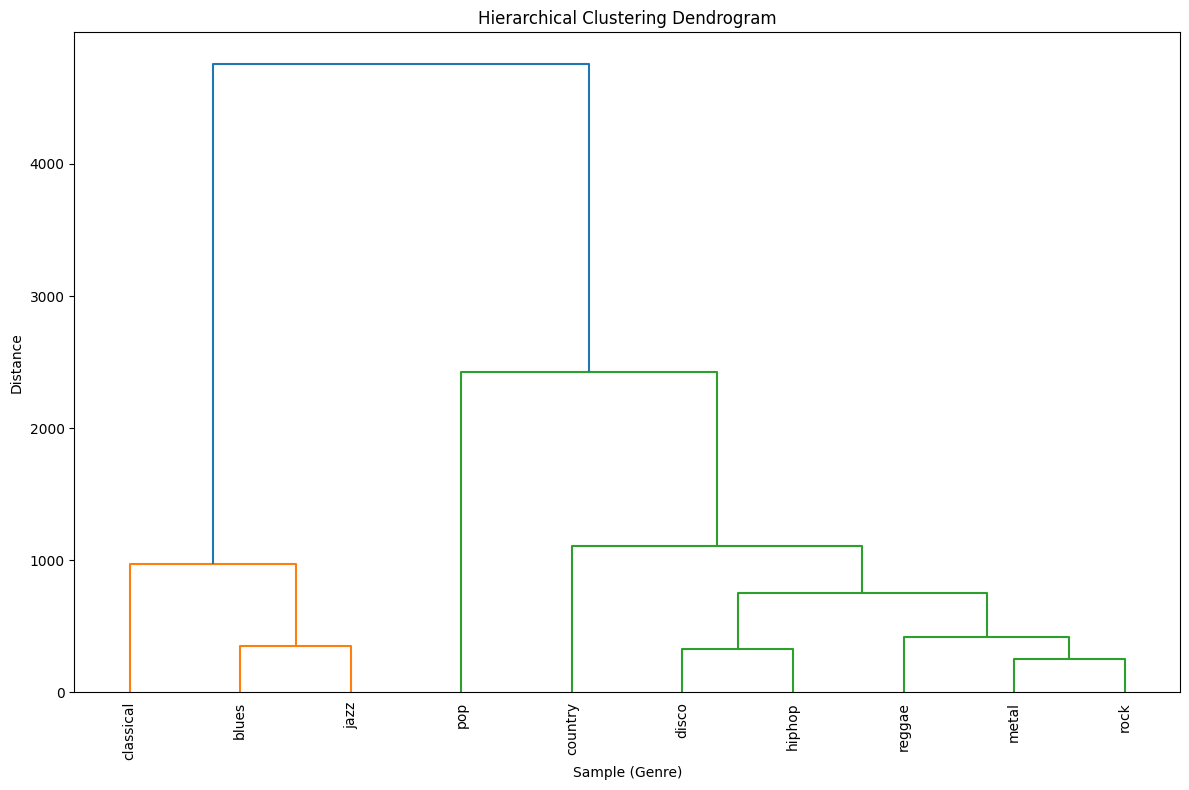

In [31]:
group_cols = [col for col in labeled_features_df.columns if col not in ['filename']]
genre_agg = labeled_features_df.groupby('genre')[group_cols].mean().reset_index()

display(genre_agg)

feature_columns = [col for col in genre_agg.columns if col != 'genre']
X = genre_agg[feature_columns].values

Z = linkage(X, method='ward')

plt.figure(figsize=(12, 8))

labels = labeled_features_df['genre'].values

dendrogram(
    Z,
    labels=genre_agg['genre'].values,
    leaf_rotation=90,  
    leaf_font_size=10,
    color_threshold=0.7 * max(Z[:, 2]) 
)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample (Genre)')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

The dendogram clearly shows that clusters exist. Based on the structure of the dendogram, there are most likely three clusters in this dataset. 

1. Cluster: (Classical, Blues, Jazz)
2. Cluster: (Pop, Country)
3. Cluster (Disco, Hiphop, Reggae, Metal, Rock)

## 3.1 KMeans 

### Determine Optimal Number of Clusters for K-Means  
This cell uses the `KMeansClustering` class to identify the optimal number of clusters for the unlabeled dataset:  
- An instance of the `KMeansClustering` class is initialized with the scaled unlabeled feature data (`unlabeled_scaled`) and the original `unlabeled_features_df`.  
- The `finding_k` method is called with a range of cluster numbers (`[2, 11]`).  

The range `[2, 11]` was selected based on domain knowledge:  
- The labeled dataset contains 10 genres, making it impossible for the unlabeled dataset to contain more than 10 meaningful clusters.  
- A minimum of 2 clusters was chosen because having only 1 cluster would indicate no clustering, defeating the purpose of the analysis.  

This process helps determine the ideal number of clusters for the dataset using metrics like the elbow method or silhouette scores.


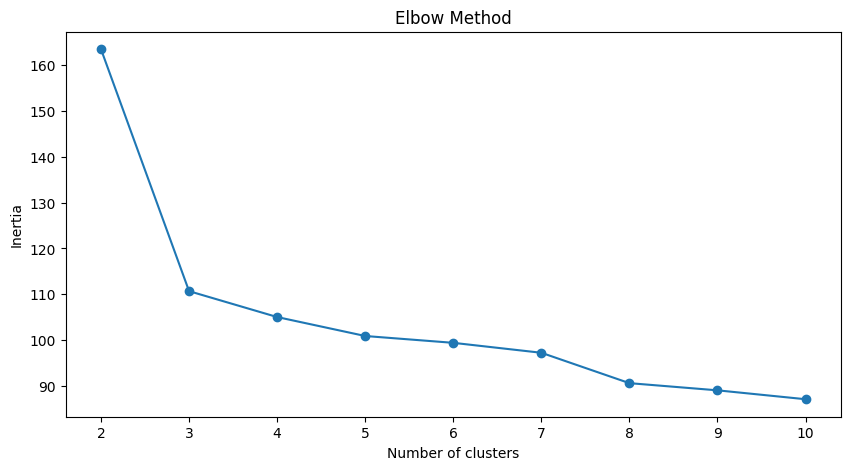

In [32]:
kmc = f.KMeansClustering(unlabeled_scaled, unlabeled_features_df)

kmc.finding_k([2, 11])

### Determining the Optimal Number of Clusters

An iterative approach was applied to determine the optimal number of clusters for the KMeans algorithm. Cluster values ranging from 2 to 10 were evaluated. For each cluster count:

- A KMeans model was trained using the scaled features of the "unlabeled" dataset.
- The **inertia score** (sum of squared distances of samples to their closest cluster center) was recorded to quantify the model's performance.

The results were visualized using an **Elbow Method plot** to identify the ideal number of clusters, where the inertia score shows a significant decrease before plateauing.


### Optimal Number of Clusters

Based on the **Elbow Plot**, the optimal number of clusters was determined to be **three**. This conclusion is drawn from the point where the inertia score shows a significant decrease and begins to plateau, indicating diminishing returns for higher cluster counts.


In [33]:
clustered_df = kmc.create_kmeans(3)

### Prepare Data for Clustering and Classification  
This cell prepares the data for further analysis and classification:  
- The `cluster` column from the clustered DataFrame (`clustered_df`) is added to the `unlabeled_knn` DataFrame.  
- The unlabeled dataset is split into features (`unlabeled_X`) and labels (`unlabeled_y`), where the `cluster` column serves as the label.  
- The `labeled_knn` DataFrame is assigned to `labeled_X` for use in comparison or model training.  

These steps ensure that both labeled and unlabeled datasets are properly structured for clustering and classification tasks.


In [34]:
unlabeled_knn['cluster'] = clustered_df['cluster']

unlabeled_X, unlabeled_y = unlabeled_knn.drop('cluster', axis=1), unlabeled_knn['cluster']
labeled_X = labeled_knn

### 3.1.1 Determining genres

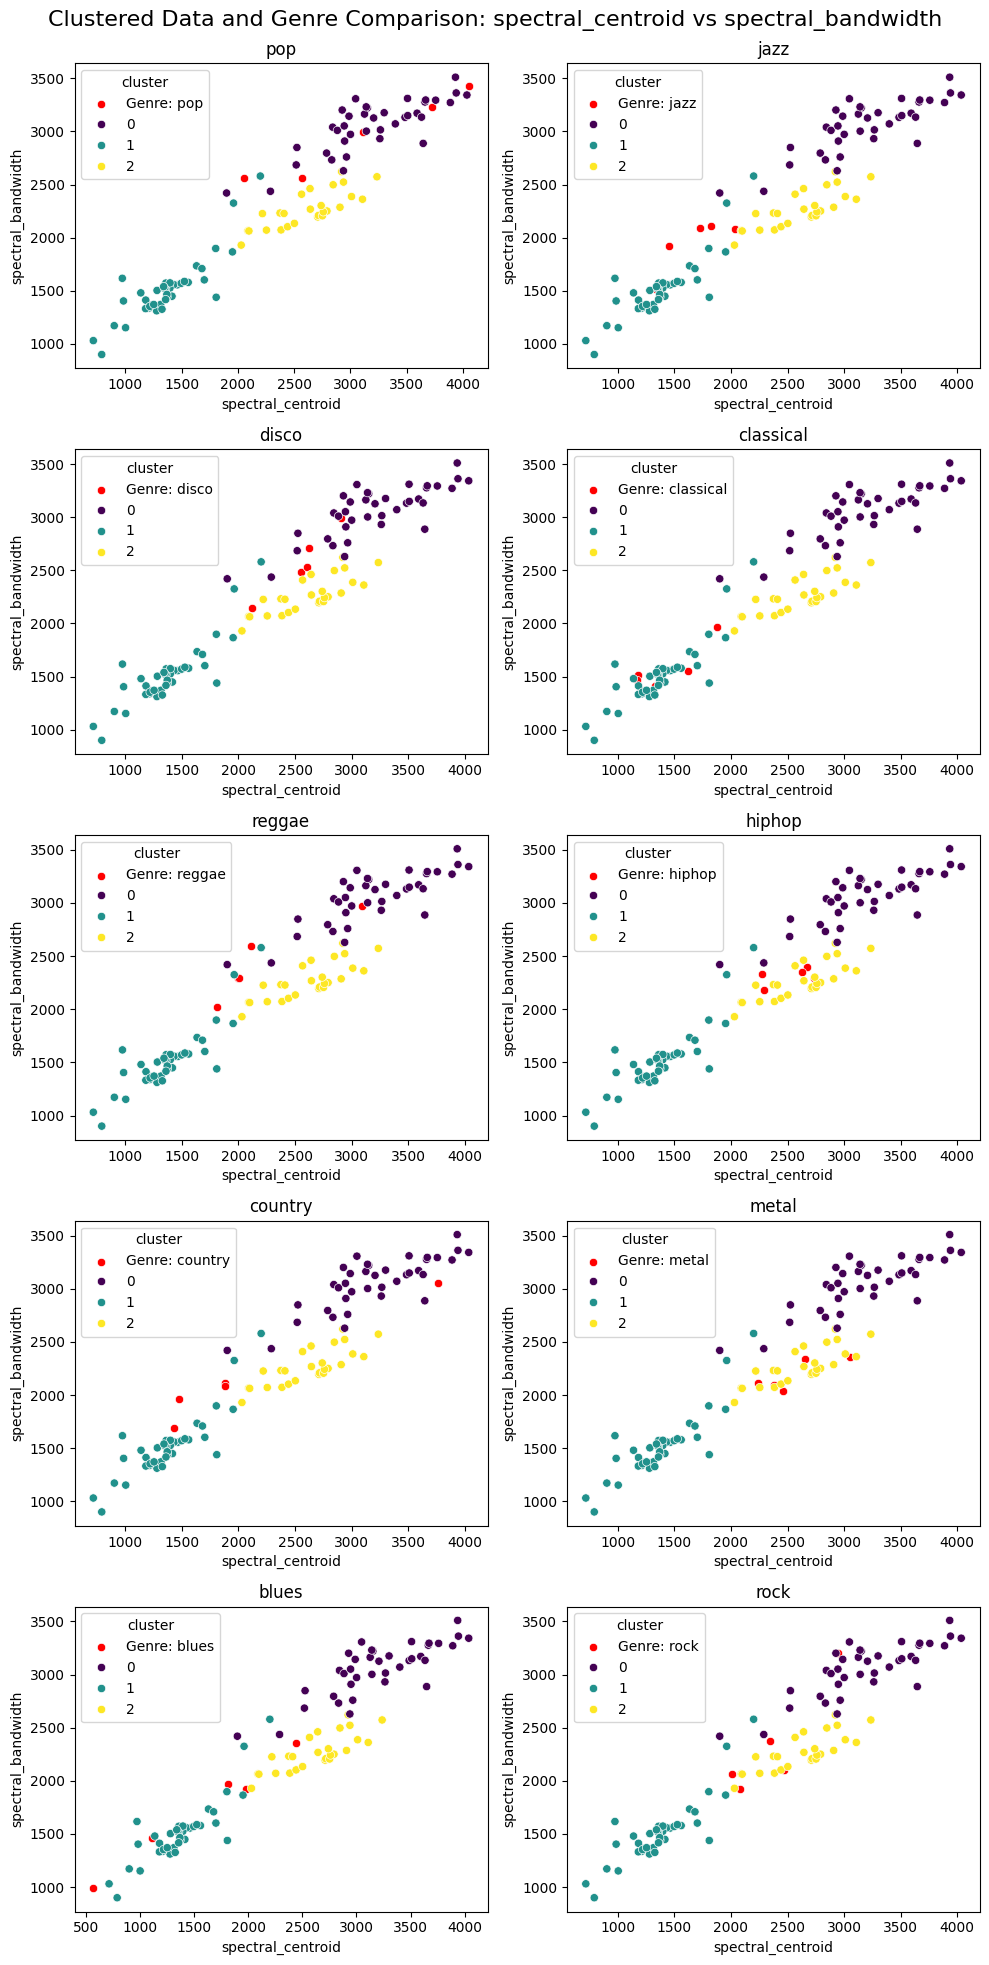

In [35]:
pcv = f.PostClusteringVisualizations(clustered_df, labeled_features_df)

pcv.scatter_plot('spectral_centroid', 'spectral_bandwidth')

#### Clustering Analysis: Spectral Bandwidth vs. Spectral Centroid  

From the analysis of **spectral bandwidth** and **spectral centroid**, distinct clustering patterns were identified. The mapping of clusters to genres is as follows:  

| **Cluster** | **Genres** |  
| --- | --- |  
| 0 | Pop |  
| 1 | Classical |  
| 2 | Hip-Hop, Metal, Rock |  

This mapping highlights that certain genres, such as **Pop**, form a clearly defined cluster due to unique spectral properties, while others, such as **Hip-Hop**, **Metal**, and **Rock**, share overlapping features, grouping them into a single cluster. These results align with the expectation that genres with similar acoustic characteristics often exhibit overlapping clusters.  


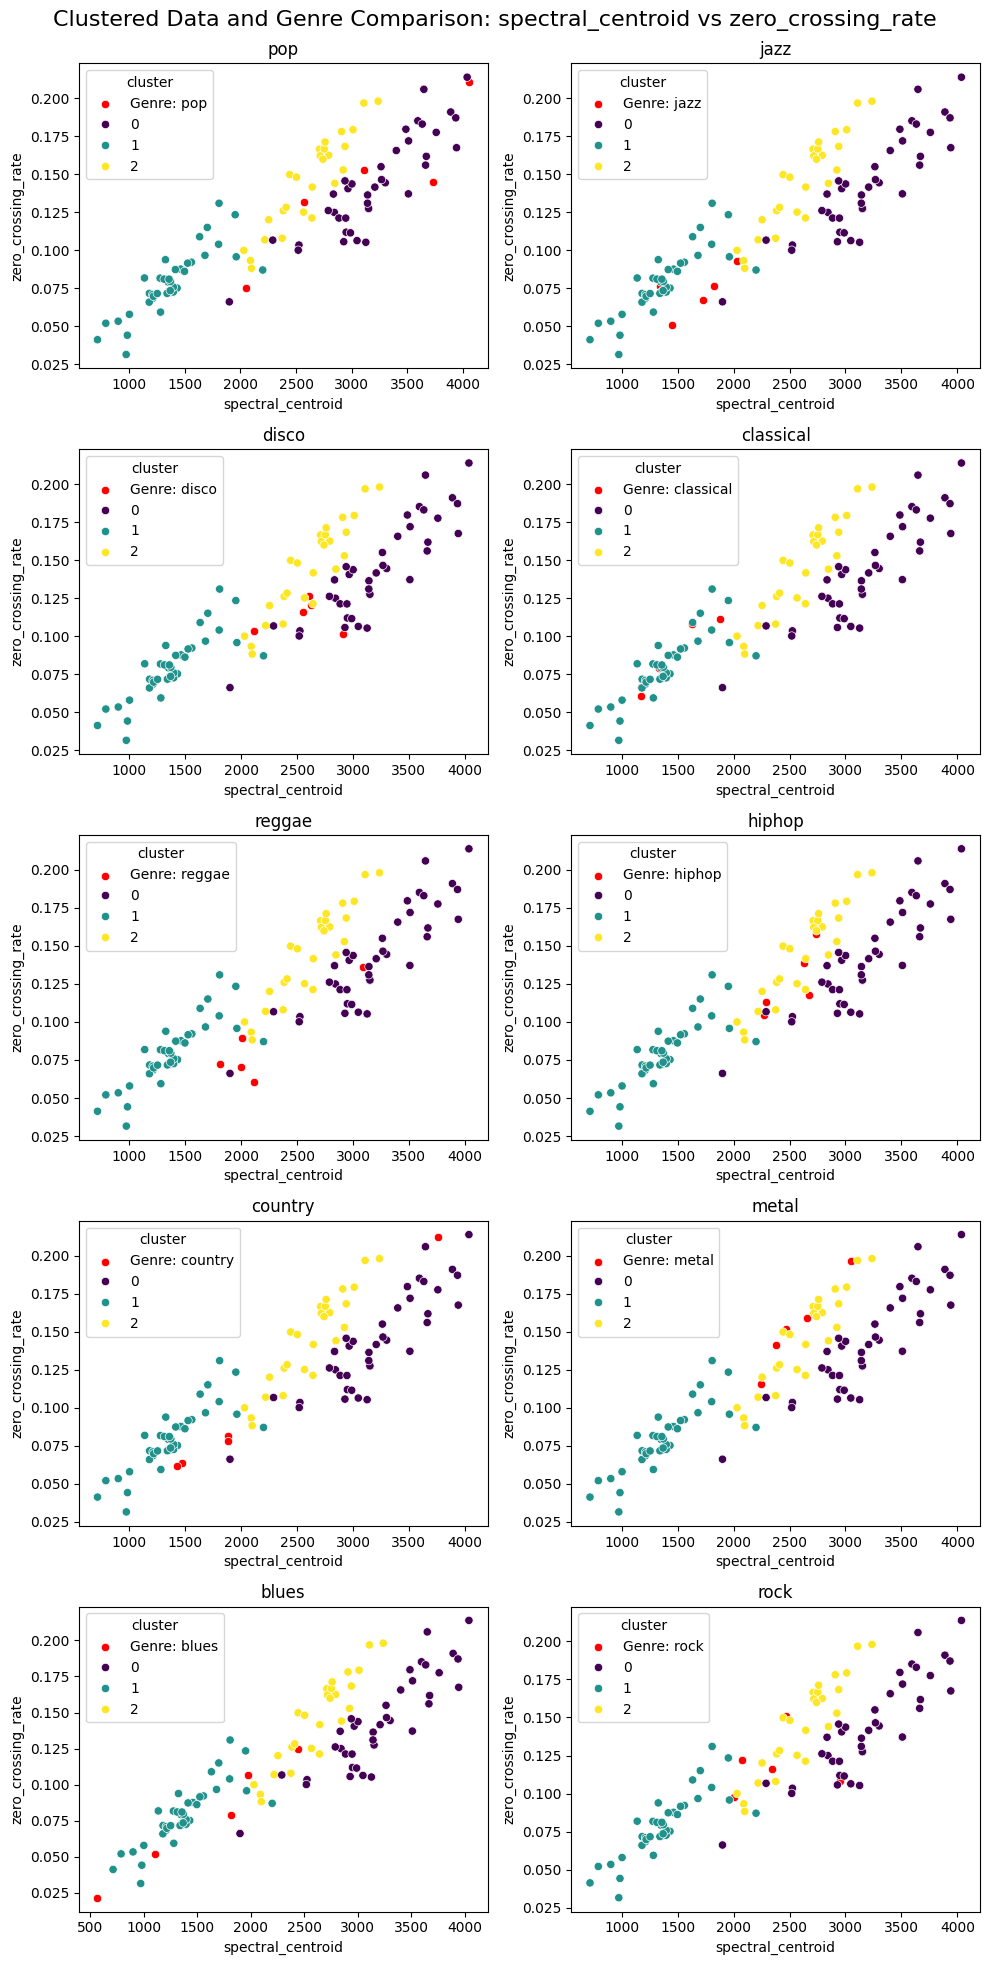

In [36]:
pcv.scatter_plot('spectral_centroid', 'zero_crossing_rate')

#### Clustering Analysis: Zero Crossing Rate vs. Spectral Centroid  

Analyzing the plots of **zero crossing rate** and **spectral centroid** revealed the following genre distributions across clusters:  

| **Cluster** | **Genres** |  
| --- | --- |  
| 0 | Pop |  
| 1 | Classical |  
| 2 | Hip-Hop, Metal |  

#### Key Insights:  
- **Cluster 0**: Strongly associated with the **Pop** genre due to its distinct audio features, making it a well-defined cluster.  
- **Cluster 1**: Clearly aligned with the **Classical** genre, indicating its unique spectral properties.  
- **Cluster 2**: Encompasses genres such as **Hip-Hop** and **Metal**, suggesting overlapping characteristics in terms of zero crossing rate and spectral centroid.  

This clustering analysis establishes a clear mapping for genres with distinct audio profiles, while highlighting the need for additional features or techniques to better separate overlapping genres within Cluster 2.  

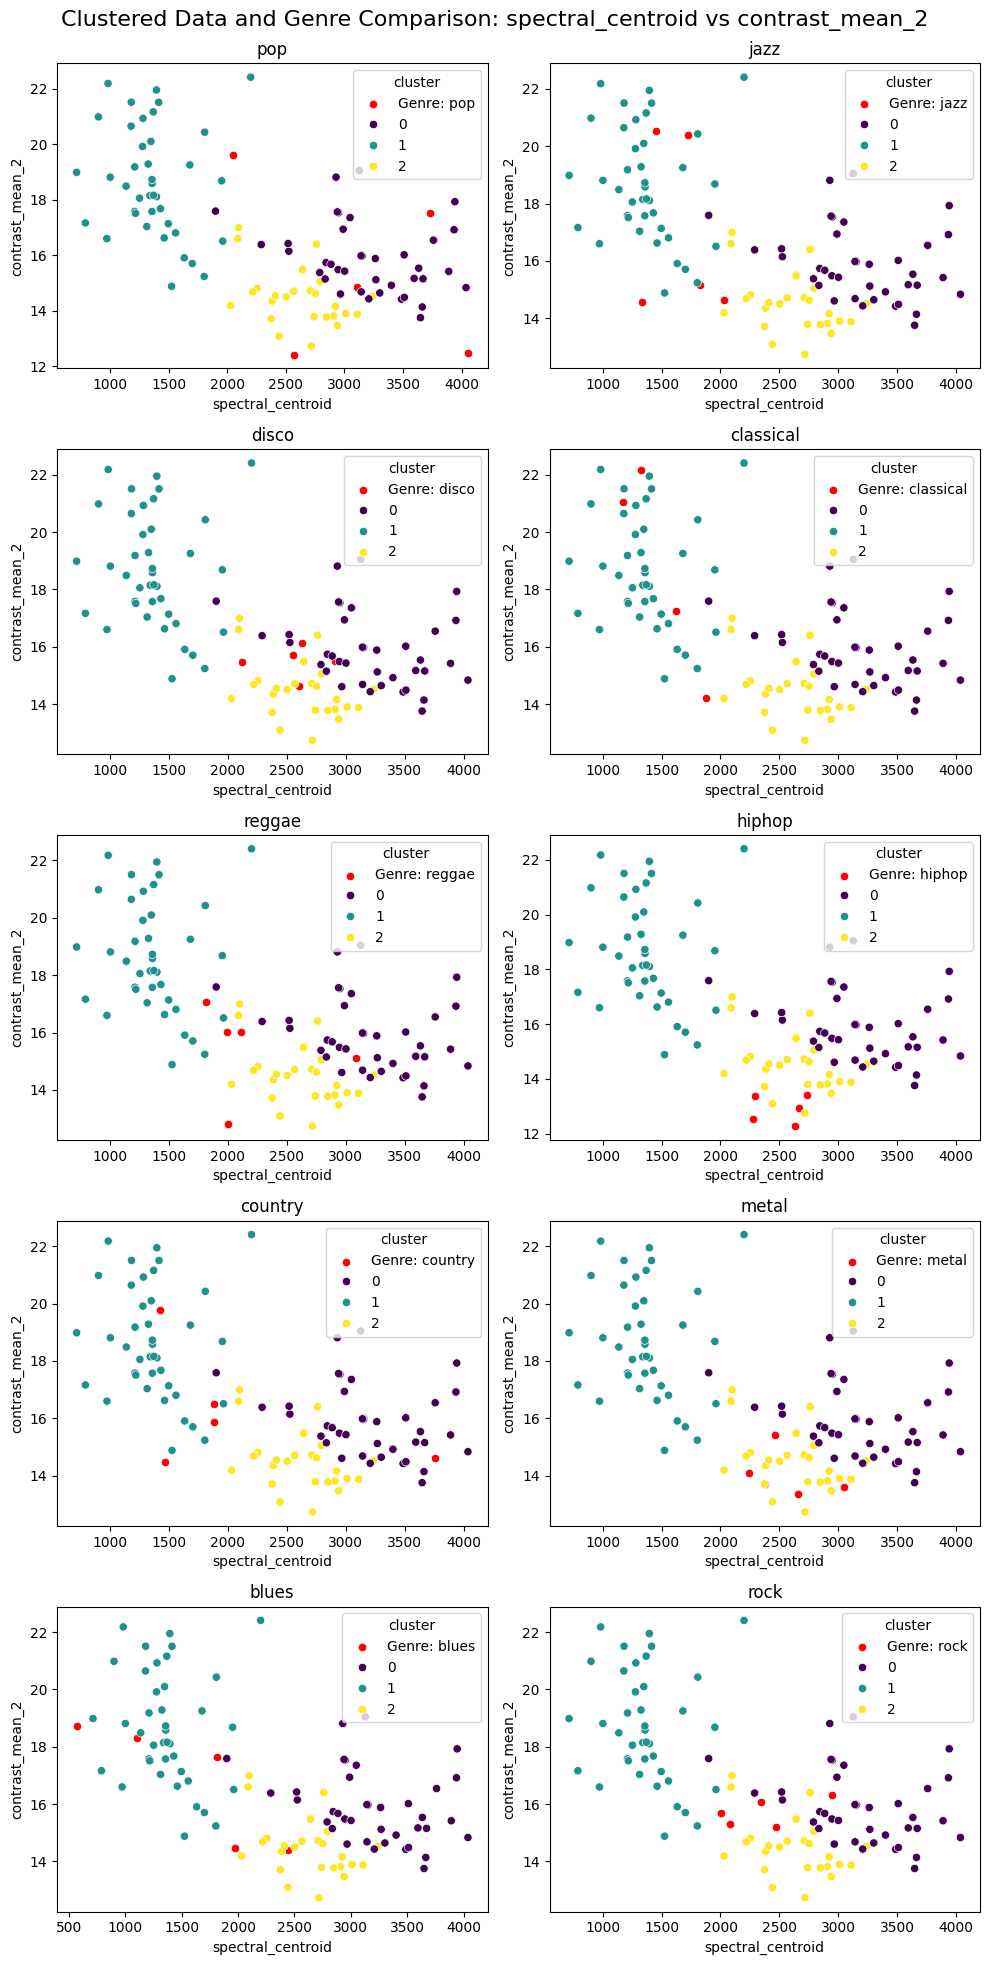

In [37]:
pcv.scatter_plot('spectral_centroid', 'contrast_mean_2')

#### Clustering Analysis: Contrast Mean 2 vs. Spectral Centroid

By analyzing the plots of **Contrast Mean 2** and **Spectral Centroid**, the following genre distributions across clusters were identified:

| **Cluster** | **Genres** |
| --- | --- |
| 0 | Pop |
| 1 | Classical | 
| 2 | Metal |

#### Final Genre Assignments
From all previous visualizations, we can conclude the following:
- **Cluster 0**: Pop
- **Cluster 1**: Classical
- **Cluster 2**: Metal

#### Next Steps
To validate these assumptions, a **K-Nearest Neighbors (KNN)** model will be trained to predict the clusters in the labeled dataset. This will help confirm the accuracy of the clustering results and the genre assignments.


In [38]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(unlabeled_X, unlabeled_y)

predicted_labels = knn.predict(labeled_X)

In [39]:
labeled_features_df['cluster'] = predicted_labels

clusters_genres = labeled_features_df.groupby(['cluster', 'genre']).size().reset_index().sort_values(by=['cluster', 0], ascending=False)

cluster_0 = clusters_genres[clusters_genres['cluster'] == 0]
cluster_1 = clusters_genres[clusters_genres['cluster'] == 1]
cluster_2 = clusters_genres[clusters_genres['cluster'] == 2]

display(cluster_0.head())
display(cluster_1.head())
display(cluster_2.head())

,cluster,genre,0
1,0,disco,4
2,0,pop,4
3,0,reggae,3
4,0,rock,2
0,0,country,1


,cluster,genre,0
6,1,classical,5
8,1,jazz,4
5,1,blues,3
7,1,country,2
9,1,pop,1


,cluster,genre,0
14,2,hiphop,5
16,2,metal,5
18,2,rock,3
11,2,blues,2
12,2,country,2


#### Validation Results: KNN Model

After running the KNN model, we can confirm that both the visual analysis and the mathematical operations arrive at the same conclusion regarding genre assignments:

| **Cluster** | **Genres** |
| --- | --- |
| 0 | Pop |
| 1 | Classical | 
| 2 | Metal |

This alignment between visual insights and predictive modeling validates the clustering results, confirming the accuracy of the genre assignments.

### 3.1.2 Mapping clusters to genres

In [40]:
c0_g = 'pop'
c1_g = 'classical'
c2_g = 'metal'

cluster_genre_mapping = {0: c0_g, 1: c1_g, 2: c2_g}

kmc.cluster_to_genre(cluster_genre_mapping)

kmc.create_submission()

## 3.2 PCA

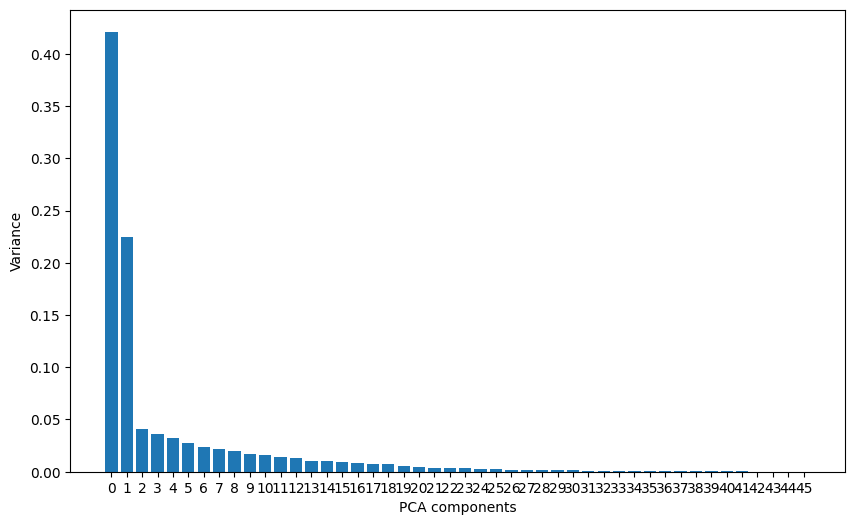

In [41]:
pcar = f.PCAReduction(unlabeled_scaled)

pcar.find_n()

#### Principal Component Analysis (PCA) Feature Selection  

From the PCA plot, it is evident that there is a significant decline in explained variance between the 0th and 1st components, as well as between the 1st and 2nd components. However, beyond the 2nd component, the decline in explained variance becomes negligible.  

Based on this observation, we will select **2 PCA features** for further analysis.  


In [42]:
pca_features = pcar.reduction(2)
pca_features_labeled = pcar.reduce_labeled(labeled_scaled)

In [43]:
pca_features_df = pd.DataFrame(pca_features, columns=['PCA 1', 'PCA 2'])
pca_features_labeled_df = pd.DataFrame(pca_features_labeled, columns=['PCA 1', 'PCA 2'])
pca_features_labeled_df['genre'] = labeled_features_df['genre']

### 3.2.1 Clustering with PCA

In [44]:
kmc_pca = f.KMeansClustering(pca_features, unlabeled_features_df)

clustered_df_pca = kmc_pca.create_kmeans(3)

In [45]:
pca_features_df['cluster'] = clustered_df_pca['cluster']

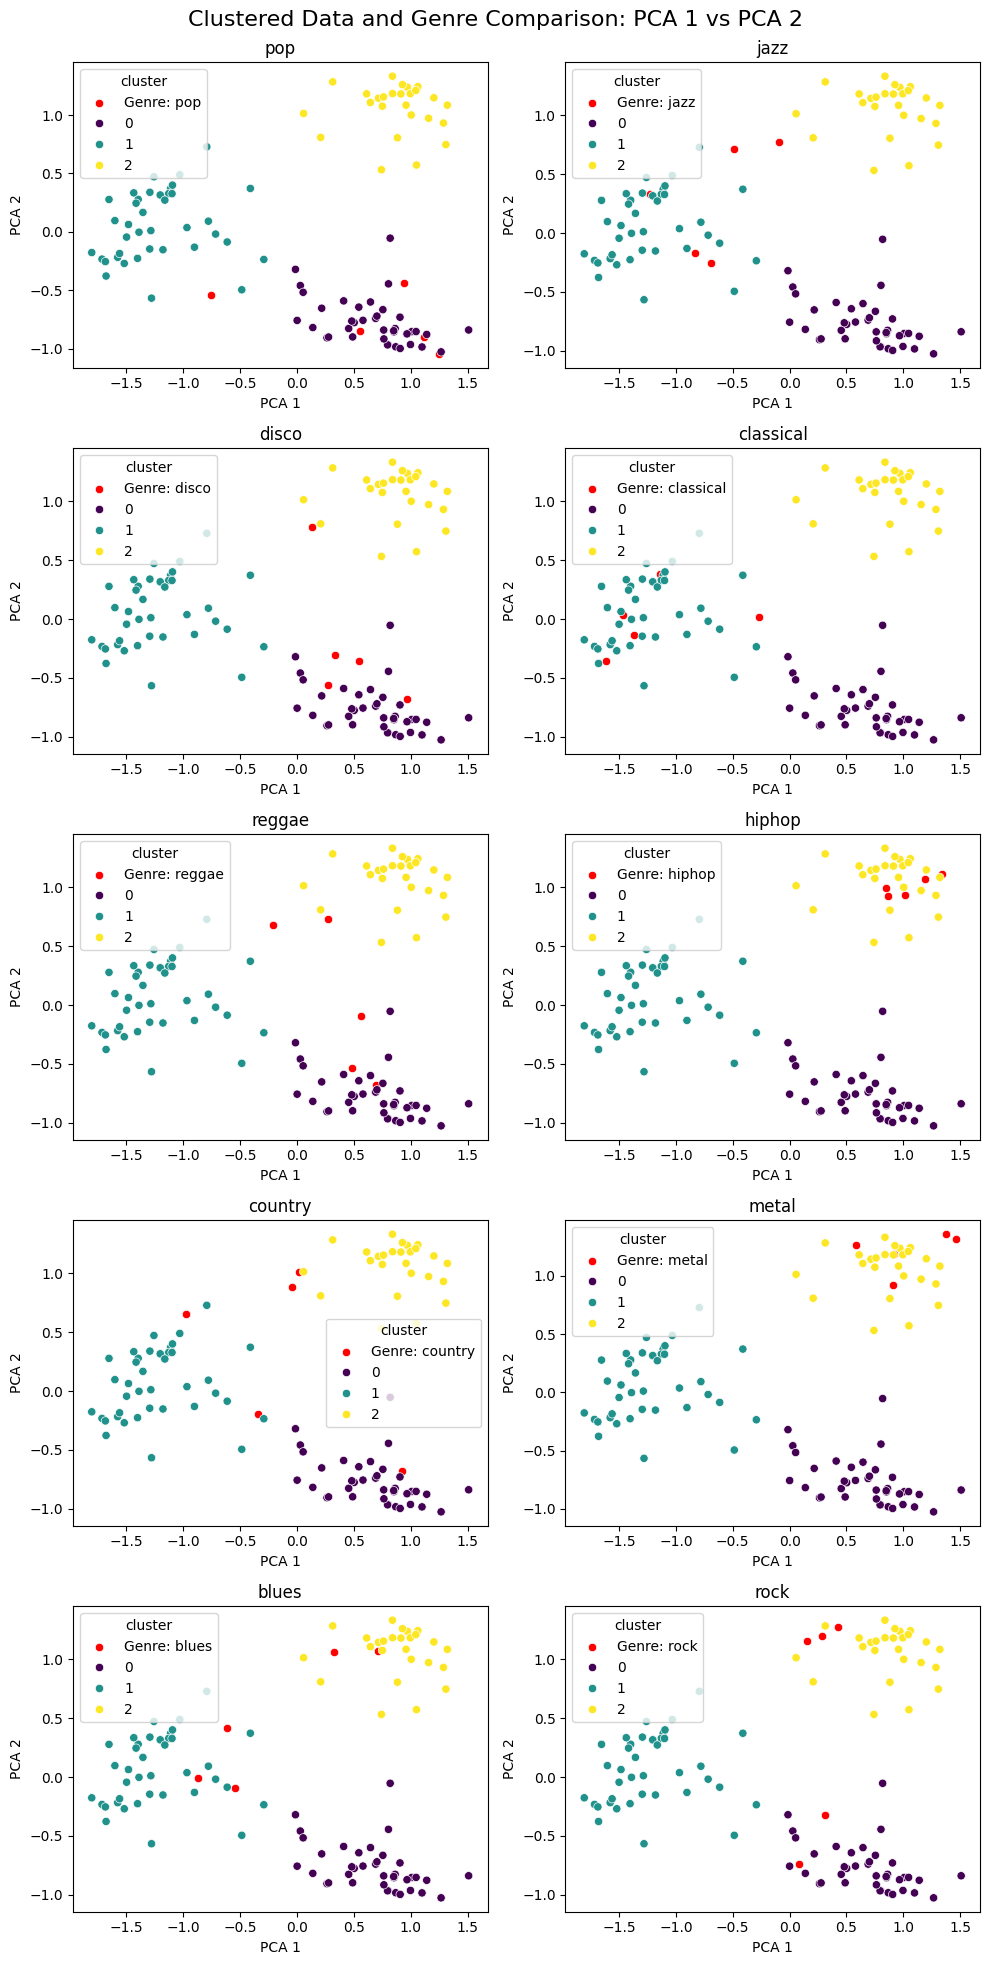

In [46]:
pcv = f.PostClusteringVisualizations(pca_features_df, pca_features_labeled_df)
pcv.scatter_plot('PCA 1', 'PCA 2')

#### PCA Results  

The PCA reduction has effectively created two features that distinctly separate the three clusters, as observed in the plot. This clear separation indicates that the two principal components are sufficient to capture the underlying structure of the data and distinguish between the clusters.


### 3.2.2 Determining genres

In [47]:
pd.crosstab(clustered_df_pca['cluster'], clustered_df['cluster'])

cluster,0,1,2
cluster,,,
0,39,0,0
1,0,40,0
2,0,0,26


#### Cluster Consistency  

From the crosstab, we can observe that the clusters are identical, with no differences between them. Therefore, we will apply the same cluster-to-genre mapping as we did for the standard KMeans clustering approach.


In [48]:
kmc_pca.cluster_to_genre(cluster_genre_mapping)

kmc_pca.create_submission()

### 3.2.3 Theory PCA

## 3.3 NMF

In [49]:
unlabeled_scaled

array([[1.35670639, 1.58242261, 1.39770478, ..., 1.6604201 , 1.74969455,
        1.13899376],
       [1.37243283, 1.3700634 , 1.7611666 , ..., 1.21348908, 1.53756744,
        1.0173272 ],
       [1.0224809 , 1.        , 1.41576621, ..., 1.20499389, 1.41170696,
        1.        ],
       ...,
       [1.97133762, 1.94327291, 1.09240817, ..., 1.15551088, 1.17030979,
        1.75115146],
       [1.08074034, 1.19315871, 1.76179115, ..., 1.63084217, 1.97222776,
        1.00125301],
       [1.16176455, 1.18045394, 1.77262479, ..., 1.53566172, 1.33479381,
        1.00347534]])

In [50]:
nmfr = f.NMFReduction(unlabeled_scaled)
df_nmf_unlabeled = nmfr.reduction()
df_nmf_labeled = nmfr.reduce_labeled(labeled_scaled)

In [51]:
df_nmf_labeled['genre'] = labeled_features_df['genre']

display(df_nmf_unlabeled.head())
display(df_nmf_labeled.head())

,0,1,2
0,0.245401,0.209728,0.946463
1,0.613184,0.597203,0.517063
2,0.589472,0.065917,0.805095
3,0.227249,0.862498,0.452168
4,0.148493,0.855621,0.495846


,0,1,2,genre
0,0.060566,0.160581,0.985163,pop
1,0.658784,0.360846,0.660147,jazz
2,0.144280,0.215141,0.965866,disco
3,0.578261,0.146430,0.802603,classical
4,0.445185,0.651395,0.614407,reggae


### 3.3.1 Clustering with NMF

In [52]:
kmc_nmf = f.KMeansClustering(df_nmf_unlabeled, unlabeled_features_df)

clustered_df_nmf = kmc_nmf.create_kmeans(3)

In [53]:
df_nmf_unlabeled['cluster'] = clustered_df_nmf['cluster']

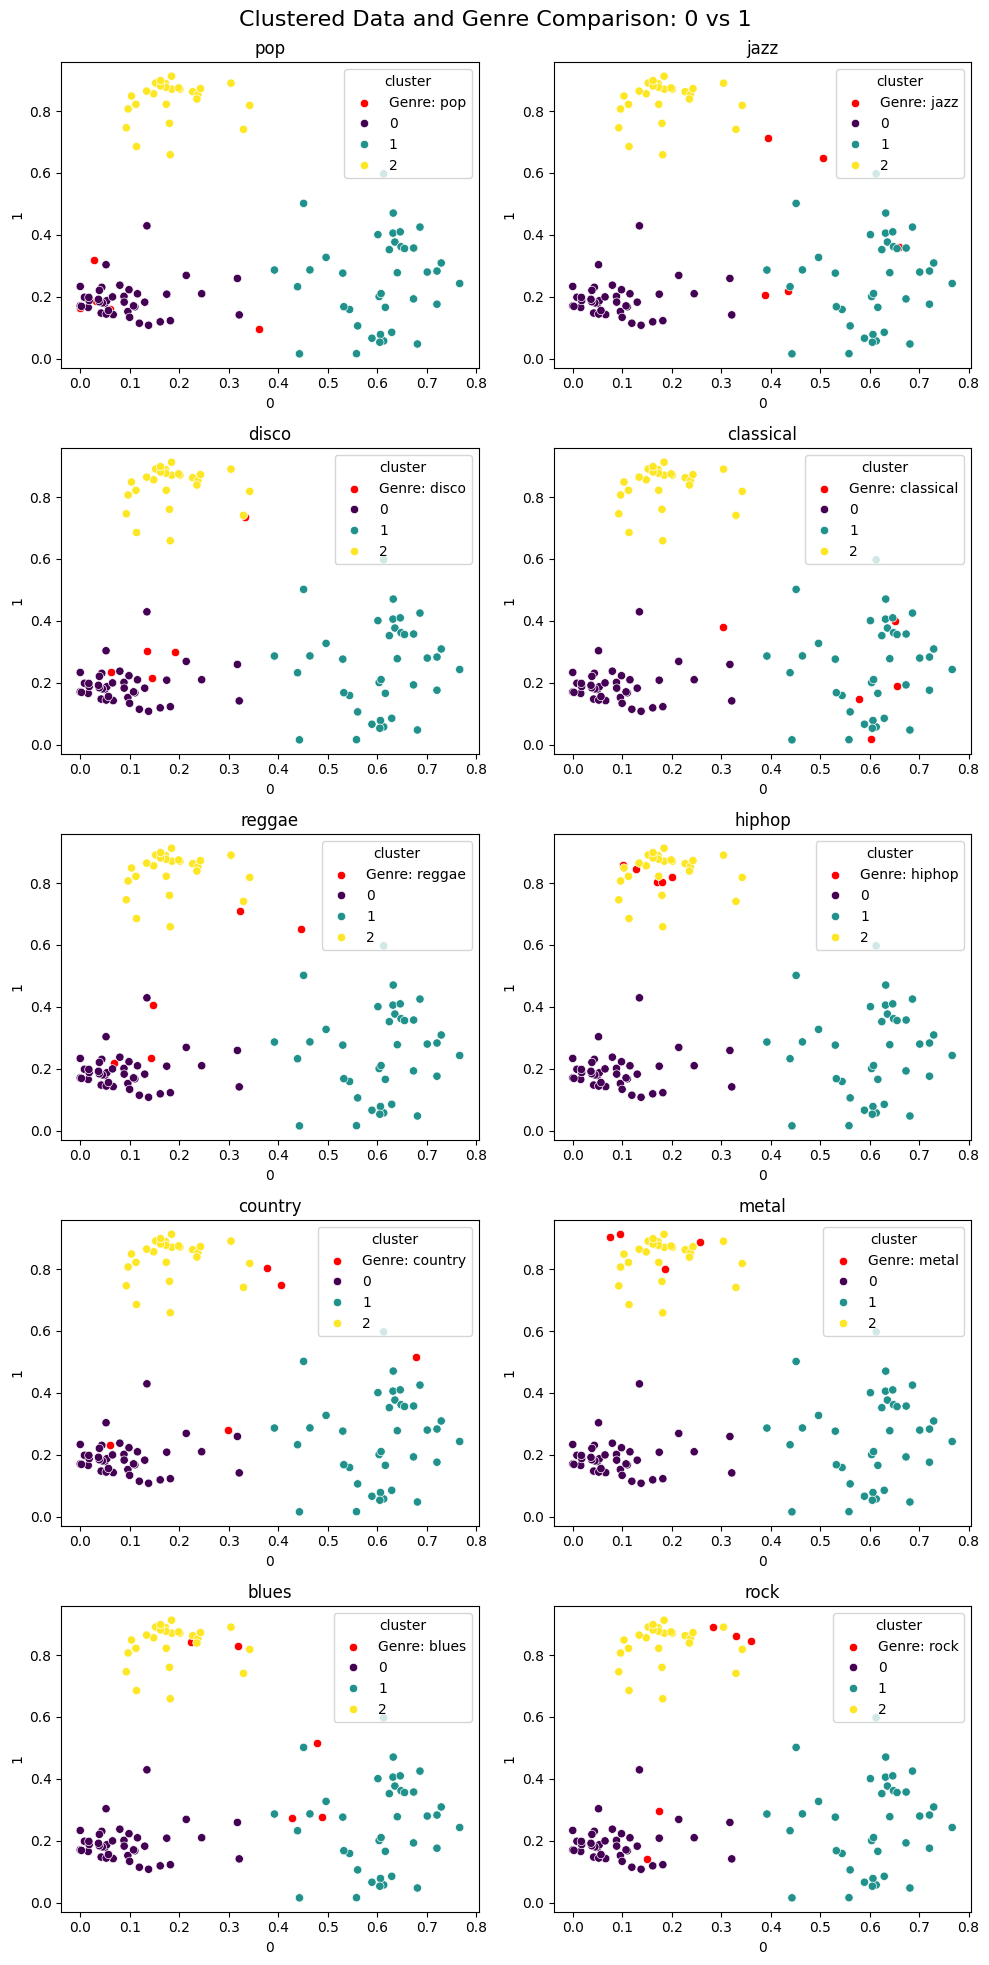

In [54]:
pcv = f.PostClusteringVisualizations(df_nmf_unlabeled, df_nmf_labeled)
pcv.scatter_plot(0, 1)

### 3.3.2 Determining genres

In [55]:
pd.crosstab(df_nmf_unlabeled['cluster'], clustered_df['cluster'])

cluster,0,1,2
cluster,,,
0,41,0,0
1,0,38,0
2,0,0,26


#### Cluster Consistency  

From the crosstab, we can observe that the clusters are identical, with no differences between them. Therefore, we will apply the same cluster-to-genre mapping as we did for the standard KMeans clustering approach.


In [56]:
kmc_pca.cluster_to_genre(cluster_genre_mapping)

kmc_pca.create_submission()

### 3.3.3 Theory NMF

## 3.4 Comparions of PCA and NMF

# 4. Conclusion

# 5. Sources

Librosa. (n.d.). Spectral centroid. Retrieved January 2, 2025, from https://librosa.org/doc-playground/0.7.2/generated/librosa.feature.spectral_centroid.html

Librosa. (n.d.). Spectral bandwidth. Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.spectral_bandwidth.html#id1

Librosa. (n.d.). Zero crossing rate. Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.zero_crossing_rate.html

Librosa. (n.d.). Root-mean-square energy (RMS). Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.rms.html

Librosa. (n.d.). Spectral rolloff. Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.spectral_rolloff.html

Librosa. (n.d.). Mel-frequency cepstral coefficients (MFCC). Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.mfcc.html

Librosa. (n.d.). Chroma short-time Fourier transform. Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.chroma_stft.html

Librosa. (n.d.). Dynamic beat tracking. Retrieved January 2, 2025, from https://librosa.org/doc/main/auto_examples/plot_dynamic_beat.html

Librosa. (n.d.). Spectral contrast. Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.spectral_contrast.html

Librosa. (n.d.). Tonnetz. Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.tonnetz.html

Librosa. (n.d.). Spectral flatness. Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.spectral_flatness.html

Wikipedia contributors. (n.d.). Spectral flatness. Wikipedia. Retrieved January 2, 2025, from https://en.wikipedia.org/wiki/Spectral_flatness